In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_basinc = pd.read_csv('/Users/ardahanaytan/Desktop/STAJ/Hava Durumu Tahmin Projesi/data/weather_datas/basinc.csv')
df_bulut = pd.read_csv('/Users/ardahanaytan/Desktop/STAJ/Hava Durumu Tahmin Projesi/data/weather_datas/bulut.csv')
df_nem = pd.read_csv('/Users/ardahanaytan/Desktop/STAJ/Hava Durumu Tahmin Projesi/data/weather_datas/nem.csv')
df_ruzgar = pd.read_csv('/Users/ardahanaytan/Desktop/STAJ/Hava Durumu Tahmin Projesi/data/weather_datas/ruzgar_hizi_yonu.csv')
df_sicaklik = pd.read_csv('/Users/ardahanaytan/Desktop/STAJ/Hava Durumu Tahmin Projesi/data/weather_datas/sicaklik.csv')
df_yagmur = pd.read_csv('/Users/ardahanaytan/Desktop/STAJ/Hava Durumu Tahmin Projesi/data/weather_datas/yagmur.csv')
df_kar = pd.read_csv('/Users/ardahanaytan/Desktop/STAJ/Hava Durumu Tahmin Projesi/data/weather_datas/kar.csv')

ctable = ['Basinc','Bulut','Nem','Ruzgar Hizi','Ruzgar Yonu','Sicaklik','Yagis','Kar']
tables = [df_nem, df_ruzgar, df_sicaklik, df_yagmur, df_kar]
real_df = pd.merge(df_basinc, df_bulut, on = ['Yil', 'Ay', 'Gun', 'Saat'])

for i in tables:
    real_df = pd.merge(real_df, i, on = ['Yil', 'Ay', 'Gun', 'Saat'])

df = real_df.copy()
df = df.dropna()
df['Yil'] = df['Yil'].str[1:].astype(int)
df['Ay'] = df['Ay'].map({
    'Ocak': 1, 'Şubat': 2, 'Mart': 3, 'Nisan': 4, 'Mayıs': 5, 'Haziran': 6,
    'Temmuz': 7, 'Ağustos': 8, 'Eylül': 9, 'Ekim': 10, 'Kasım': 11, 'Aralık': 12
})
df['Gun'] = df['Gun'].str[1:].astype(int)
df['Saat'] = df['Saat'].str[1:].str[:2].astype(int)

df['datetime'] = pd.to_datetime(df[['Yil', 'Ay', 'Gun']].astype(str).agg('-'.join, axis=1) + ' ' + 
                                df['Saat'].astype(str), format='%Y-%m-%d %H')
df.set_index('datetime', inplace=True)
df.drop(columns=['Yil', 'Ay', 'Gun', 'Saat'], inplace=True)
df.columns = ctable

df.tail()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/ardahanaytan/Desktop/STAJ/Hava Durumu Tahmin Projesi/data/weather_datas/ruzgar_hizi_yonu.csv'

In [8]:
df['Bulut'].describe()

count    58152.000000
mean        47.265683
std         34.500815
min          0.000000
25%         17.000000
50%         41.000000
75%         82.000000
max        100.000000
Name: Bulut, dtype: float64

In [1]:
df['Sicaklik'].plot();

NameError: name 'df' is not defined

In [20]:
df_t = df['Nem'].resample('M').mean()
df_t.head()

datetime
2018-01-31    86.116555
2018-02-28    77.165127
2018-03-31    80.617893
2018-04-30    68.669403
2018-05-31    74.930880
Freq: M, Name: Nem, dtype: float64

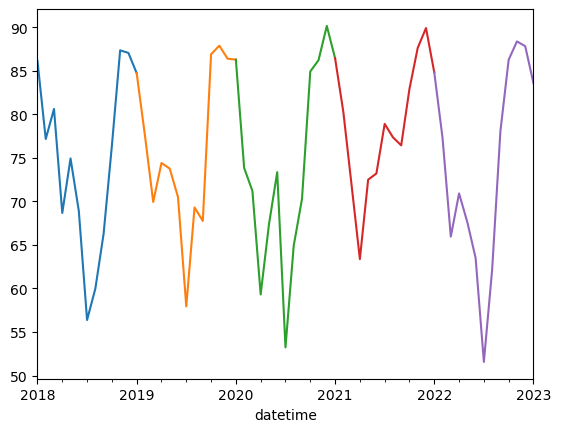

In [27]:
df_t[:13].plot();
df_t[12:25].plot();
df_t[24:37].plot();
df_t[36:49].plot();
df_t[48:61].plot();